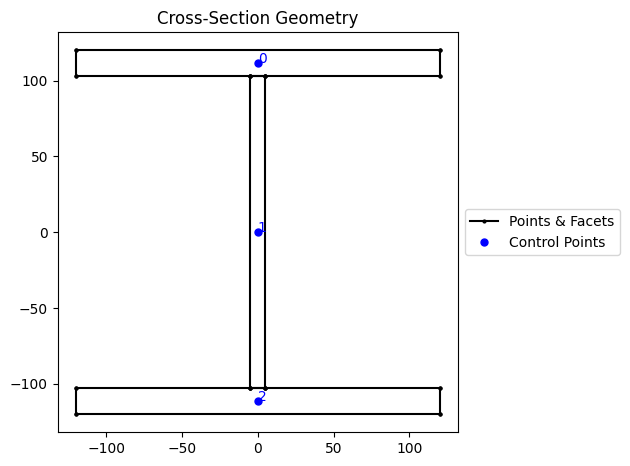

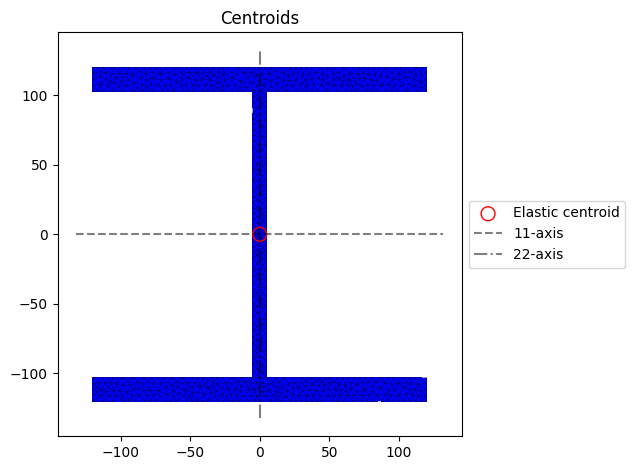

(108928526.66666661, 39185166.66666664, 1.891748979687695e-09)
ixx=1.08929e+08
Ixx_expected=1.08929e+08
Ixx_expected=1.08929e+08 <<-->> ixx / E_mod = ixx=1.08929e+08 / E_mod=1 = 1.08929e+08


     Section Properties     
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property ┃         Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ A        │  1.022000e+04 │
│ Perim.   │  1.420000e+03 │
│ Mass     │  8.022700e+07 │
│ E.A      │  1.022000e+04 │
│ E.Qx     │  6.197070e-10 │
│ E.Qy     │ -6.883738e-11 │
│ cx       │ -6.735556e-15 │
│ cy       │  6.063669e-14 │
│ E.Ixx_g  │  1.089285e+08 │
│ E.Iyy_g  │  3.918517e+07 │
│ E.Ixy_g  │  1.891749e-09 │
│ E.Ixx_c  │  1.089285e+08 │
│ E.Iyy_c  │  3.918517e+07 │
│ E.Ixy_c  │  1.891749e-09 │
│ E.Zxx+   │  9.077377e+05 │
│ E.Zxx-   │  9.077377e+05 │
│ E.Zyy+   │  3.265431e+05 │
│ E.Zyy-   │  3.265431e+05 │
│ rx       │  1.032394e+02 │
│ ry       │  6.192063e+01 │
│ phi      │  0.000000e+00 │
│ E.I11_c  │  1.089285e+08 │
│ E.I22_c  │  3.918517e+07 │
│ E.Z11+   │  9.077377e+05 │
│ E.Z11-   │  9.077377e+05 │
│ E.Z22+   │  3.265431e+05 │
│ E.Z22-   │  3.265431e+05 │
│ r11      │  1.032394e+02 │
│ r22      │  6.192063e+01 │
│ E_eff    │  1.000000e+00 │
│ G_eff    │  3.846154e-01 │
│ nu_eff   │  3.000000e-01 │
└──────────┴───────────────┘


None


In [24]:
import sectionproperties.pre.library.primitive_sections as primitive_sections

from sectionproperties.analysis.section import Section
from sectionproperties.pre.pre import Material

# Define material
E_mod = 1
steel = Material(name='Steel', elastic_modulus=E_mod, poissons_ratio=0.3, density=7850,
             yield_strength=235, color='blue')

# Define parameters H section (a.k.a. W-section)
top_flange_width: int = 240
top_flange_height: int = 17
web_width: int = 10
web_height: int = 206
bot_flange_width: int = 240
bot_flange_height: int = 17

# Define primitive sections
top_flange = primitive_sections.rectangular_section(top_flange_width, top_flange_height, material=steel)
top_flange = top_flange.shift_section(-top_flange_width / 2, web_height / 2)

web = primitive_sections.rectangular_section(web_width, web_height, material=steel)
web = web.shift_section(-web_width / 2, -web_height / 2)

bot_flange = primitive_sections.rectangular_section(bot_flange_width, bot_flange_height, material=steel)
bot_flange = bot_flange.shift_section(-bot_flange_width / 2, -web_height / 2 - bot_flange_height)


# Create commons nodes between primitive sections (makes no difference)
top_flange = top_flange - web 
bot_flange = bot_flange - web


# Do the section_properties calculations
geometry = top_flange | web | bot_flange
geometry = top_flange + web + bot_flange
geometry.plot_geometry()


geometry.create_mesh(mesh_sizes=[15])
section = Section(geometry)
section.calculate_geometric_properties()

section.plot_centroids()
ixx, iyy, ixy = section.get_ic()
print(section.get_ic())
print(f"{ixx=:.5e}")

# CHECK IF RESULT IS AS EXPECTED
total_height = top_flange_height + web_height + bot_flange_height
Ixx_expected = 1/12*top_flange_width*total_height**3 - 1/12*(top_flange_width-web_width)*web_height**3 # Only if double symmetric
print(f"{Ixx_expected=:.5e}")
print(f"{Ixx_expected=:.5e} <<-->> ixx / E_mod = {ixx=:.5e} / {E_mod=} = {ixx/E_mod:.5e}")
print(section.display_results())
# It appears that when a material is present the ixx is NOT correct


section.g